In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipykernel_5584/2427701451.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load dataset
df = sns.load_dataset('penguins')
df.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
136,Adelie,Dream,35.6,17.5,191.0,3175.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
27,Adelie,Biscoe,40.5,17.9,187.0,3200.0,Female
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
306,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,Female
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,Female
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
151,Adelie,Dream,41.5,18.5,201.0,4000.0,Male
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male


In [3]:
# How many Nan values are per column?

df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
# General info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# Drop NAN values, since they represent only around 3% of total records.

df.dropna(axis=0,inplace=True, ignore_index=True)
df.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
56,Adelie,Biscoe,37.6,17.0,185.0,3600.0,Female
279,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,Male
45,Adelie,Biscoe,40.1,18.9,188.0,4300.0,Male
300,Gentoo,Biscoe,47.5,14.0,212.0,4875.0,Female
214,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
86,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
251,Gentoo,Biscoe,44.0,13.6,208.0,4350.0,Female
50,Adelie,Biscoe,39.0,17.5,186.0,3550.0,Female
25,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


## 1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?

In [7]:
print('Cantidad de especies: ', len( df['species'].unique() ))

Cantidad de especies:  3


## 2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

In [8]:
adeliePicoLen = df[df.species=="Adelie"].bill_length_mm.mean()

print('Media de longitud de pico Adelie: ', adeliePicoLen, 'mm')

Media de longitud de pico Adelie:  38.82397260273973 mm


## 3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

In [9]:
GentooMass = df[df.species=="Gentoo"].body_mass_g.mean()

print('Media masa promedio en gramos de Gentoo: ', GentooMass, 'g')

Media masa promedio en gramos de Gentoo:  5092.436974789916 g


## 4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

In [10]:

df_2 = df[['bill_length_mm', 'body_mass_g']]

# Pearson correlation
billMassCorr = df_2.corr()
billMassCorr

,bill_length_mm,body_mass_g
bill_length_mm,1.000000,0.589451
body_mass_g,0.589451,1.000000


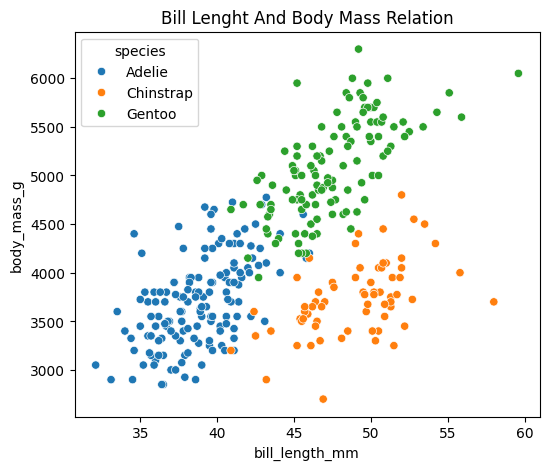

In [11]:
fig = plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')
plt.title('Bill Lenght And Body Mass Relation')
plt.show()

## 5.¿Cuál es la isla con mayor número de pingüinos en el dataset?

In [12]:
# One way to do it using value_counts()

df['island'].value_counts().reset_index()

,island,count
0,Biscoe,163
1,Dream,123
2,Torgersen,47


In [13]:
moreCrowdedIsland = df['island'].value_counts().idxmax()

print('La isla con mas pingüinos es: ', moreCrowdedIsland)

La isla con mas pingüinos es:  Biscoe


## 6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

In [14]:
ChinstrapFlipperStd = df[df.species=="Chinstrap"]['flipper_length_mm'].std()

print('la desviaición estándar de la longitud de las laetas de los Chipstrap es:', ChinstrapFlipperStd, 'mm' )

la desviaición estándar de la longitud de las laetas de los Chipstrap es: 7.131894258578147 mm


## 7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [15]:
maxBillPenguin = df[df['bill_length_mm'] == df['bill_length_mm'].max()]
maxBillPenguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
246,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


In [16]:
maxBillPenguinSpecies = maxBillPenguin['species'].iloc[0]
print('La especio del pingüino con el pico más largo del dataset es: ', maxBillPenguinSpecies)

La especio del pingüino con el pico más largo del dataset es:  Gentoo


## 8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

In [17]:
Adeli_df_sex = df[df['species'] == 'Adelie']
Adeli_df_sex_proportion = Adeli_df_sex['sex'].value_counts(normalize=True)
Adeli_df_sex_proportion

sex
Male      0.5
Female    0.5
Name: proportion, dtype: float64

## 9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

In [18]:
df_3 = df[['bill_length_mm', 'body_mass_g', 'species']]
df_3 = df_3.groupby('species').corr()
df_3

bill_length_mm  body_mass_g
species                                              
Adelie    bill_length_mm        1.000000     0.544276
          body_mass_g           0.544276     1.000000
Chinstrap bill_length_mm        1.000000     0.513638
          body_mass_g           0.513638     1.000000
Gentoo    bill_length_mm        1.000000     0.666730
          body_mass_g           0.666730     1.000000

In [19]:
print('En efecto hay una relación entre el largo del pico y la masa del mismo en cada especie.')

En efecto hay una relación entre el largo del pico y la masa del mismo en cada especie.


## 10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

All togheter


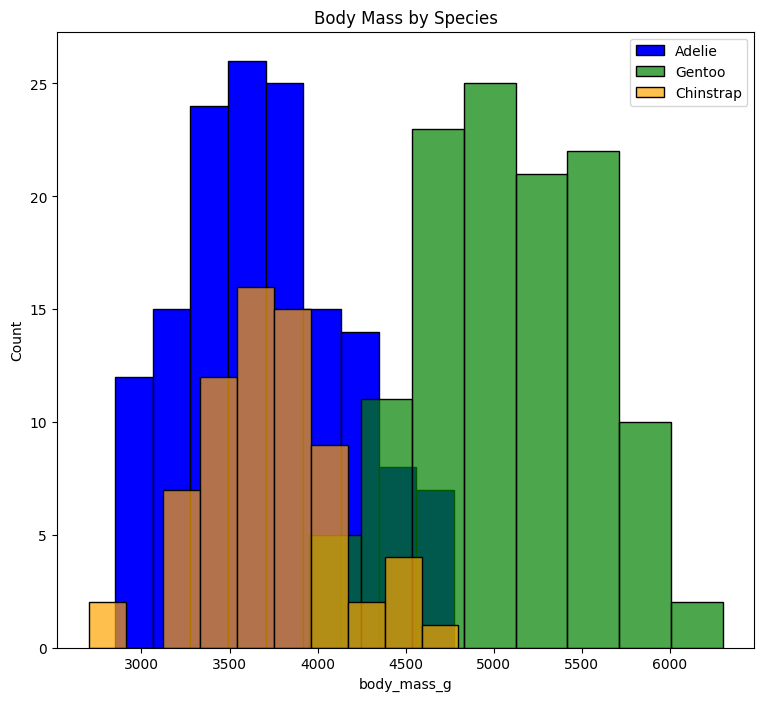

In [60]:
fig = plt.figure(figsize=(9,8))
sns.histplot(data=df[df['species'] == 'Adelie'], x='body_mass_g', label='Adelie', color='blue', alpha=1)
sns.histplot(data=df[df['species'] == 'Gentoo'], x='body_mass_g', label='Gentoo', color='green', alpha=0.7)  # Sin opacidad
sns.histplot(data=df[df['species'] == 'Chinstrap'], x='body_mass_g', label='Chinstrap', color='orange', alpha=0.7)

plt.title('Body Mass by Species')
plt.legend()

print('All togheter')
plt.show()


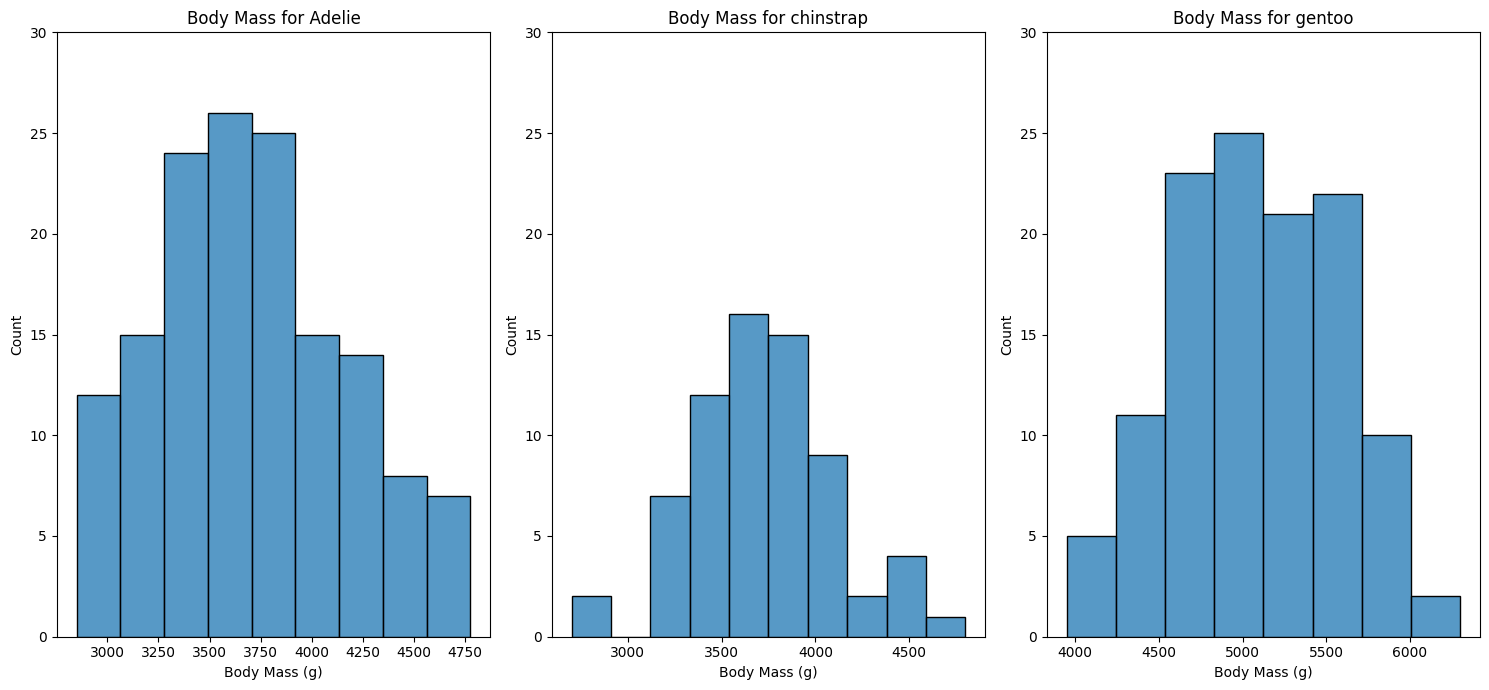

In [63]:
adelie_df = df[df['species'] == 'Adelie']
chinstrap_df = df[df['species'] == 'Chinstrap']
gentoo_df = df[df['species'] == 'Gentoo']

fig = plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
sns.histplot(data=adelie_df, x='body_mass_g')
plt.title('Body Mass for Adelie')
plt.xlabel('Body Mass (g)')
plt.ylabel('Count')
plt.ylim(0,30)

plt.subplot(1,3,2)
sns.histplot(data=chinstrap_df, x='body_mass_g')
plt.title('Body Mass for chinstrap')
plt.xlabel('Body Mass (g)')
plt.ylabel('Count')
plt.ylim(0,30)

plt.subplot(1,3,3)
sns.histplot(data=gentoo_df, x='body_mass_g')
plt.title('Body Mass for gentoo')
plt.xlabel('Body Mass (g)')
plt.ylabel('Count')
plt.ylim(0,30)

plt.tight_layout()
plt.show()

## 11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [23]:
minMax = df.groupby('species')['flipper_length_mm'].agg(['min', 'max'])
minMax = minMax.rename(columns={'min':'Flipper Min length mm','max':'Flipper Max length mm'})
minMax

,Flipper Min length mm,Flipper Max length mm
species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


## 12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

In [24]:
df_4 = df[df['body_mass_g'] > 5000]
BiggerPenguins = df_4.shape[0]
print("The amount of penguin with more 5000g on body weight are: ", BiggerPenguins)

The amount of penguin with more 5000g on body weight are:  61


## 13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

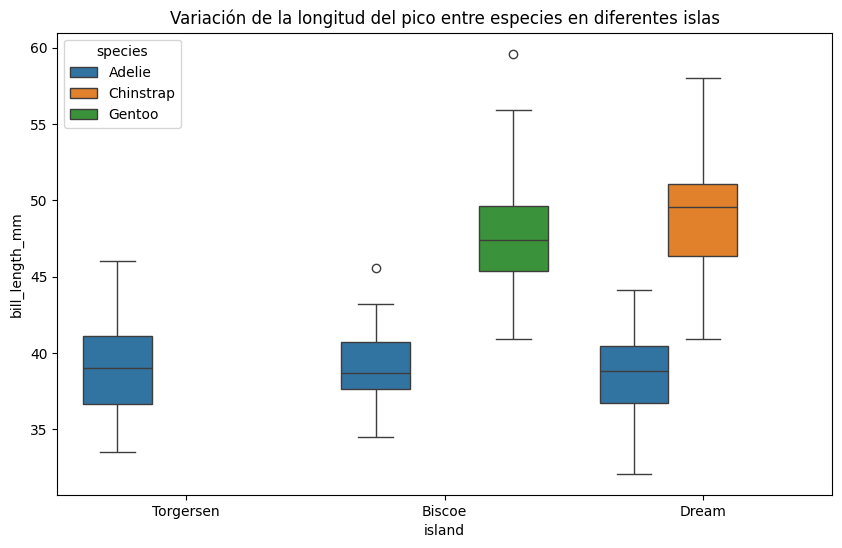

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='island', y='bill_length_mm', hue='species')
plt.title('Variación de la longitud del pico entre especies en diferentes islas')
plt.show()

In [45]:
summaryStats = df.groupby(['island', 'species'])['bill_length_mm'].describe()
print(summaryStats)

                     count       mean       std   min     25%    50%     75%  \
island    species                                                              
Biscoe    Adelie      44.0  38.975000  2.480916  34.5  37.675  38.70  40.700   
          Gentoo     119.0  47.568067  3.106116  40.9  45.350  47.40  49.600   
Dream     Adelie      55.0  38.520000  2.484276  32.1  36.700  38.80  40.450   
          Chinstrap   68.0  48.833824  3.339256  40.9  46.350  49.55  51.075   
Torgersen Adelie      47.0  39.038298  3.028097  33.5  36.650  39.00  41.100   

                      max  
island    species          
Biscoe    Adelie     45.6  
          Gentoo     59.6  
Dream     Adelie     44.1  
          Chinstrap  58.0  
Torgersen Adelie     46.0  


## 14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

In [ ]:
flipperMassGentooCorr = df[['flipper_length_mm','body_mass_g']][df['species'] == 'Gentoo'].corr()
flipperMassGentooCorr

,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.711305
body_mass_g,0.711305,1.000000


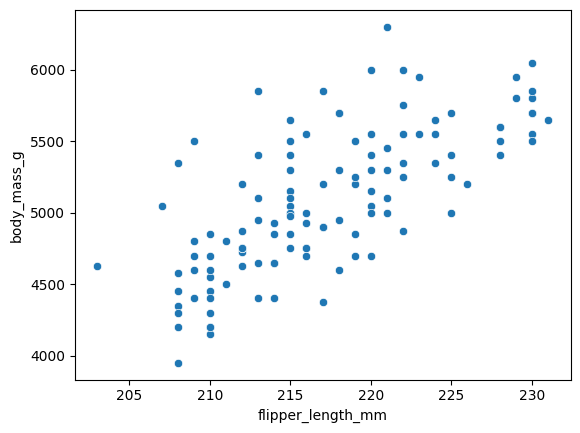

In [ ]:
sns.scatterplot(data=gentoo_df, x='flipper_length_mm', y='body_mass_g')
plt.show()

## 15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

In [50]:
#Load dataset before any modification
dff = sns.load_dataset('penguins')

missingPenguinsRecord = dff.isnull().any(axis=1).sum()
print(f'Número de pingüinos con datos faltantes: {missingPenguinsRecord}')

Número de pingüinos con datos faltantes: 11


## 16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [25]:
df_6 = df.groupby('island')['bill_length_mm'].std().reset_index()
df_6.columns = ['island', 'std mm']
df_6

df_7 = df.groupby('island')['bill_length_mm'].apply(lambda x: x.max() - x.min()).reset_index()
df_7.columns = ['island', 'diff mm']
df_7

,island,diff mm
0,Biscoe,25.1
1,Dream,25.9
2,Torgersen,12.5


## 17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

In [27]:
df_8 = df[df['species'] == 'Chinstrap']
df_8 = df_8.groupby('sex')['body_mass_g'].mean()

massDifferenceGenderChipstrap = np.abs(df_8.iloc[0]-df_8.iloc[1])
print('La diferencia de masa por sexo para los chipstrap es: ', massDifferenceGenderChipstrap, 'g')

La diferencia de masa por sexo para los chipstrap es:  411.76470588235316 g


## 18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

In [28]:
df_9 = df.groupby('species')['flipper_length_mm'].mean().reset_index()
df_9.columns = ['species', 'mean mm']
df_9

,species,mean mm
0,Adelie,190.102740
1,Chinstrap,195.823529
2,Gentoo,217.235294


In [33]:
MaxFlipperLenSpecies = df_9.iloc[df_9['mean mm'].idxmax()]
MaxFlipperLenSpecies

species        Gentoo
mean mm    217.235294
Name: 2, dtype: object

## 19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

In [29]:
df_10 = df[ df['bill_length_mm'] == df['bill_length_mm'].min()  ]
df_10

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
136,Adelie,Dream,32.1,15.5,188.0,3050.0,Female


## 20.¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

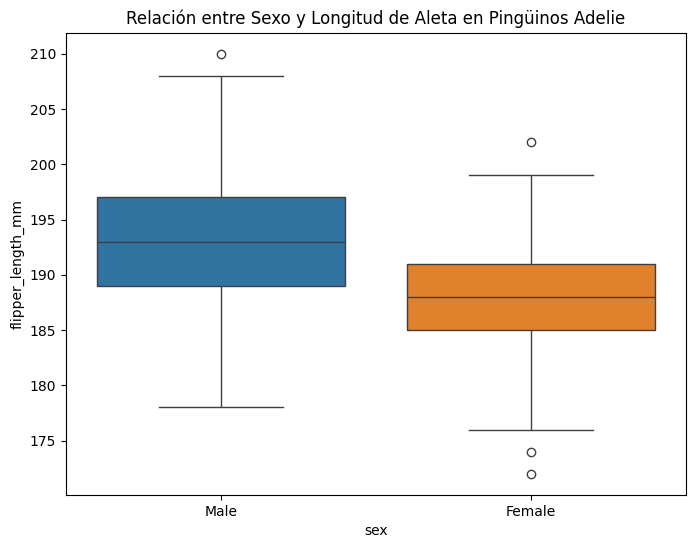

In [62]:
df_11 = df[ df['species'] == 'Adelie' ]

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_11, x='sex', y='flipper_length_mm',hue='sex')
plt.title('Relación entre Sexo y Longitud de Aleta en Pingüinos Adelie')
plt.show()